<a href="https://colab.research.google.com/github/virajvaidya/TimeSeriesAnalysis/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoregressive Integrated Moving Average (ARIMA) Modelling

Quarterly Australian GDP Data from 1960Q1 to 2020Q1

In [ ]:
pip install git+https://github.com/statsmodels/statsmodels

In [3]:
import pandas            as pd
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns
import numpy             as np

from scipy.stats                            import t
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from datetime                               import datetime
from statsmodels.tsa.stattools              import adfuller
from statsmodels.tsa.arima.model            import ARIMA

# Setting visualisation preferences in Seaborn

In [9]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [5]:
from google.colab import files
import io
uploaded = files.upload()

Saving AuQuGDP.xlsx to AuQuGDP.xlsx


In [6]:
df = pd.read_excel('AuQuGDP.xlsx')

# Setting time index

In [7]:
df['date'] = pd.to_datetime(df['Time'])
df = df.set_index('date')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,AuGDP
date,
1960-01-01,6.468300e+10
1960-04-01,6.647300e+10
1960-07-01,6.662300e+10
1960-10-01,6.649000e+10
1961-01-01,6.669000e+10


In [8]:
df = df.rename(columns={"AuGDP": "Y"})

# Line Plot

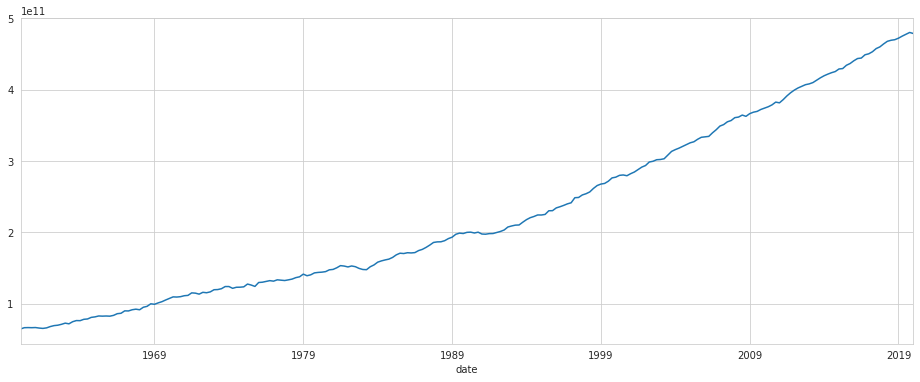

In [10]:
df['Y'].plot()
plt.show()

# Augmented Dickey-Fuller Test of Stationarity for Y

In [11]:
df2 = df

X = df2['Y'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}
 ADF statistic: -0.346, 
 p-value: 0.988, 
 critical value: {'1%': -3.9969944961660877, '5%': -3.4289434905960645, '10%': -3.1378930946180557}


# Augmented Dickey Fuller Test of Stationarity for First-Order Difference of Y

In [12]:
df2['Y_D1'] = df2['Y'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D1'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}
 ADF statistic: -15.258, 
 p-value: 0.000, 
 critical value: {'1%': -3.99715658668426, '5%': -3.4290213886201637, '10%': -3.137938763154836}


# Augmented Dickey Fuller Test of Stationarity for Second-Order Difference of Y

In [14]:
df2['Y_D2'] = df2['Y_D1'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D2'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -13.009, 
 p-value: 0.000, 
 critical value: {'1%': -3.9979881078231756, '5%': -3.4294209574472734, '10%': -3.138173000968399}
 ADF statistic: -12.068, 
 p-value: 0.000, 
 critical value: {'1%': -3.998158754122054, '5%': -3.429502948077832, '10%': -3.1382210632264758}


# Augmented Dickey Fuller Test of Stationarity for Third-Order Difference of Y

In [18]:
df2['Y_D3'] = df2['Y_D2'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D3'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -15.469, 
 p-value: 0.000, 
 critical value: {'1%': -3.998679721788444, '5%': -3.429753237774307, '10%': -3.1383677751294488}
 ADF statistic: -10.523, 
 p-value: 0.000, 
 critical value: {'1%': -3.9997641267986688, '5%': -3.430274123136559, '10%': -3.138673072997335}


#Augmented Dickey Fuller Test of Stationarity for Fourth-Order Difference of Y

In [22]:
df2['Y_D4'] = df2['Y_D3'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D4'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -18.026, 
 p-value: 0.000, 
 critical value: {'1%': -3.9993961689677087, '5%': -3.430097392315598, '10%': -3.138569493040737}
 ADF statistic: -9.282, 
 p-value: 0.000, 
 critical value: {'1%': -4.001708647316869, '5%': -3.4312078274966673, '10%': -3.1392202327591767}


#Augmented Dickey Fuller Test of Stationarity for Fifth-Order Difference of Y

In [24]:
df2['Y_D5'] = df2['Y_D4'].diff()

df2 = df2.dropna(axis = 0)
X   = df2['Y_D5'].values

result1 = adfuller(X, regression='ct', maxlag=3     , regresults=True, store=True)
result2 = adfuller(X, regression='ct', autolag='BIC', regresults=True, store=True)

out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'

print(out.format(result1[0], result1[1], result1[2]))
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -21.477, 
 p-value: 0.000, 
 critical value: {'1%': -3.9997641267986688, '5%': -3.430274123136559, '10%': -3.138673072997335}
 ADF statistic: -10.056, 
 p-value: 0.000, 
 critical value: {'1%': -4.002119902247325, '5%': -3.431405246268732, '10%': -3.1393359061507153}


#Selecting the optimal p and q values

In [25]:
df2 = df
df2['Y_D1'] = df2['Y'].diff()
df2 = df2.dropna(axis = 0)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


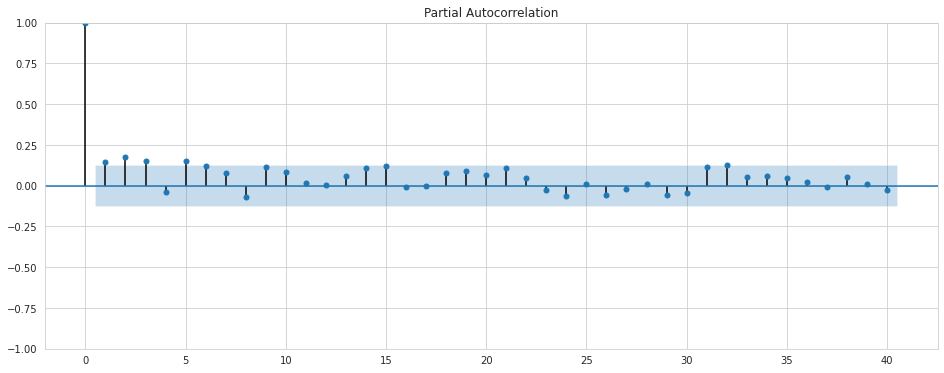

In [26]:
sm.graphics.tsa.plot_pacf(df2['Y_D1'].values.squeeze(), lags=40)
plt.show()

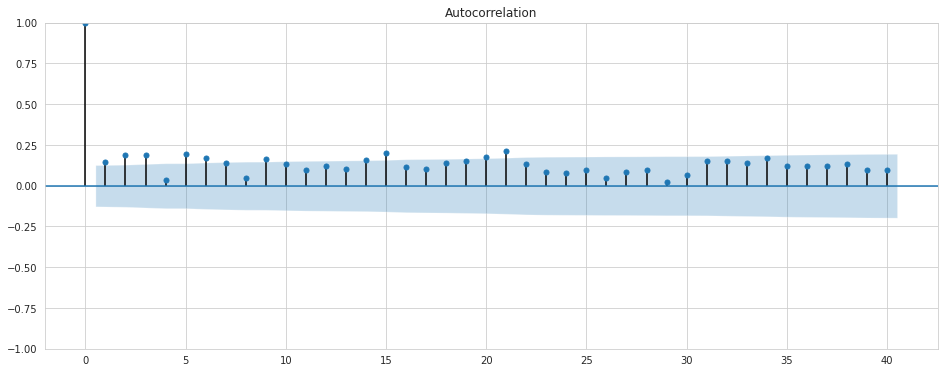

In [27]:
sm.graphics.tsa.plot_acf(df2['Y_D1'].values.squeeze(), lags=40)
plt.show()

#We start from *p = q = 7* and reduce their values one by one

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(7, 1, 7)   Log Likelihood               -5309.002
Date:                Fri, 05 Nov 2021   AIC                          10648.004
Time:                        06:34:16   BIC                          10699.834
Sample:                    04-01-1960   HQIC                         10668.902
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5533      0.390     -3.983      0.000      -2.318      -0.789
ar.L2         -1.2768      0.314     -4.065      0.000      -1.892      -0.661
ar.L3         -0.4212      0.231     -1.821      0.0

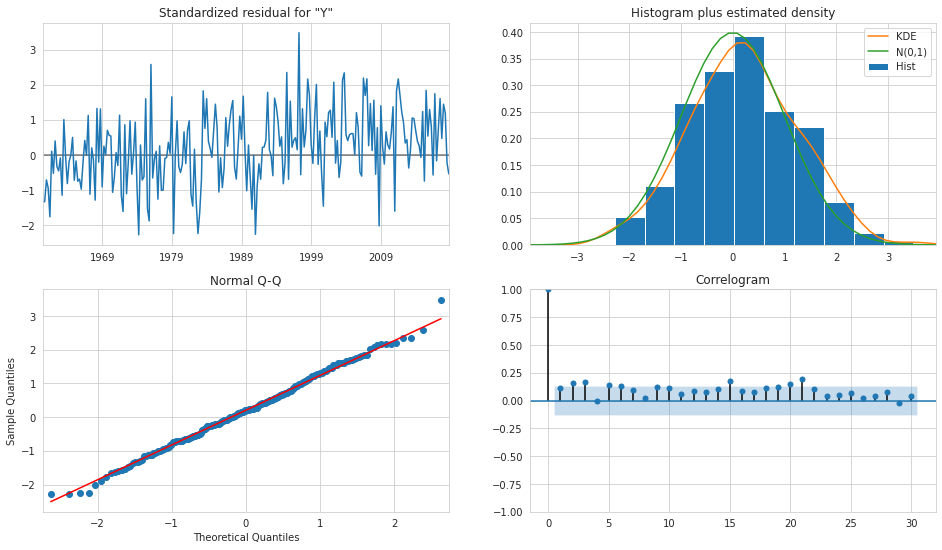

In [28]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(7,1,7))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(6, 1, 7)   Log Likelihood               -5308.323
Date:                Fri, 05 Nov 2021   AIC                          10644.647
Time:                        06:34:35   BIC                          10693.021
Sample:                    04-01-1960   HQIC                         10664.152
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5088      1.716     -0.879      0.379      -4.871       1.854
ar.L2         -1.1147      0.971     -1.148      0.251      -3.018       0.788
ar.L3          0.1047      1.001      0.105      0.9

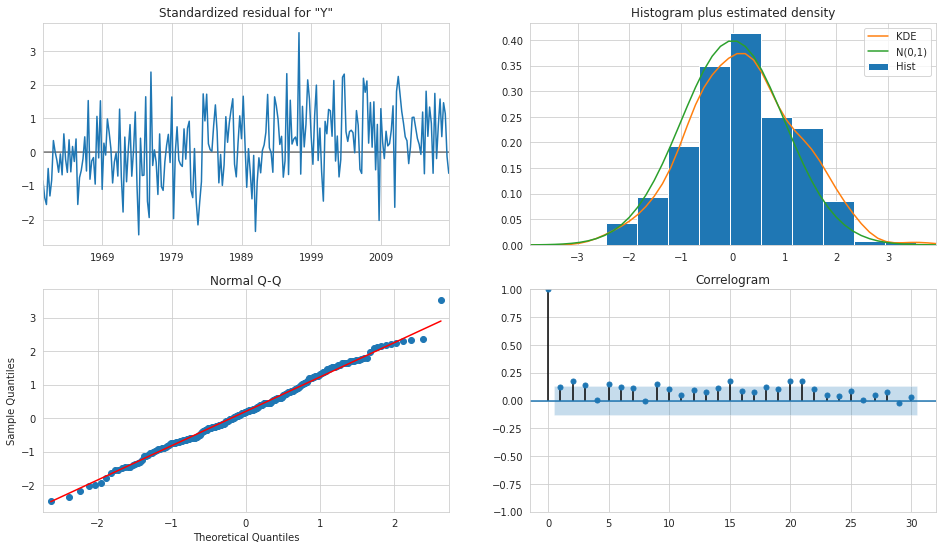

In [29]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,7))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(7, 1, 6)   Log Likelihood               -5308.654
Date:                Fri, 05 Nov 2021   AIC                          10645.308
Time:                        06:34:52   BIC                          10693.683
Sample:                    04-01-1960   HQIC                         10664.813
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3861      0.543     -2.552      0.011      -2.451      -0.322
ar.L2         -1.0554      0.348     -3.033      0.002      -1.738      -0.373
ar.L3          0.1169      0.236      0.495      0.6

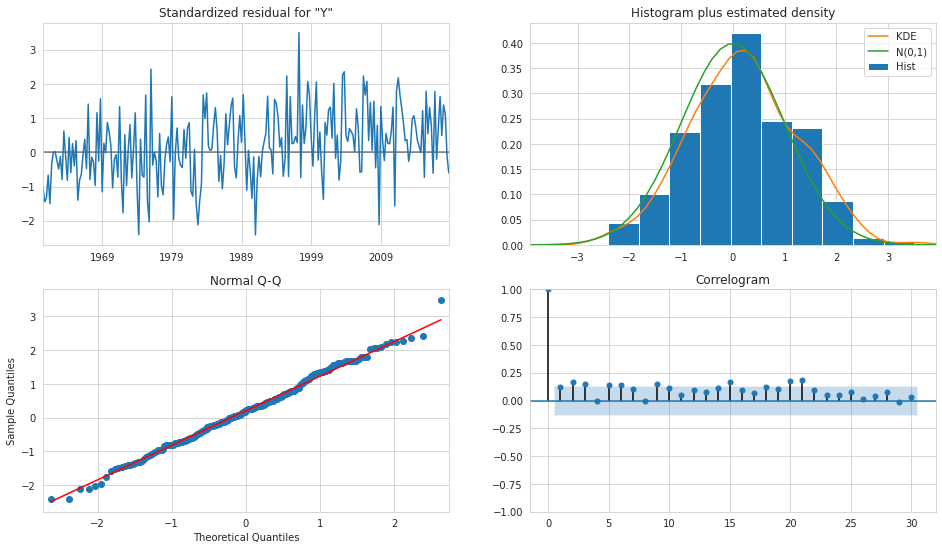

In [30]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(7,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -5309.033
Date:                Fri, 05 Nov 2021   AIC                          10644.066
Time:                        06:35:07   BIC                          10688.986
Sample:                    04-01-1960   HQIC                         10662.178
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4554      0.878     -1.658      0.097      -3.175       0.265
ar.L2         -1.0180      0.802     -1.269      0.205      -2.591       0.555
ar.L3          0.0988      0.222      0.445      0.6

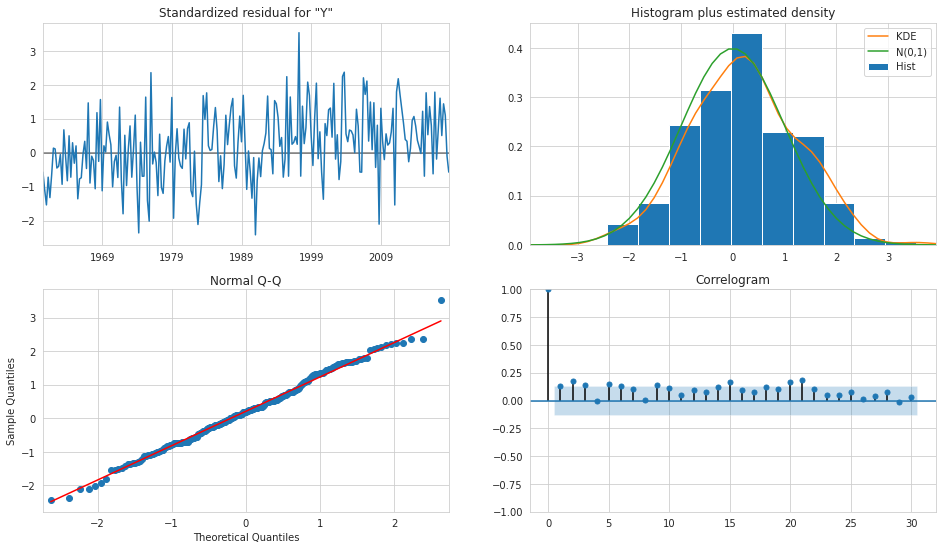

In [31]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -5308.931
Date:                Fri, 05 Nov 2021   AIC                          10641.862
Time:                        06:35:20   BIC                          10683.326
Sample:                    04-01-1960   HQIC                         10658.580
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9855      0.452     -2.181      0.029      -1.871      -0.100
ar.L2         -0.2221      0.098     -2.277      0.023      -0.413      -0.031
ar.L3          0.2817      0.078      3.628      0.0

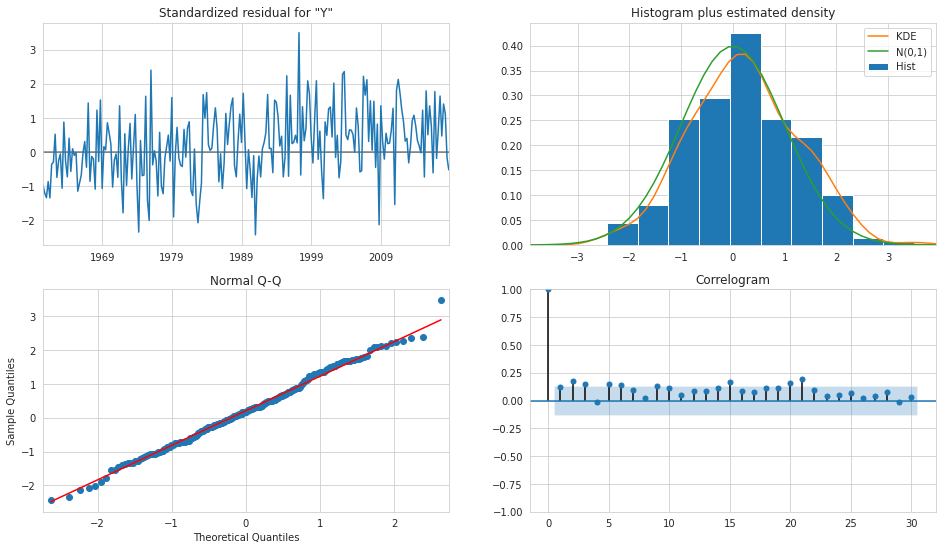

In [32]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,6))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(6, 1, 5)   Log Likelihood               -5309.218
Date:                Fri, 05 Nov 2021   AIC                          10642.437
Time:                        06:35:33   BIC                          10683.901
Sample:                    04-01-1960   HQIC                         10659.155
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0397      0.474     -2.193      0.028      -1.969      -0.110
ar.L2         -0.1855      0.083     -2.243      0.025      -0.348      -0.023
ar.L3          0.2512      0.075      3.342      0.0

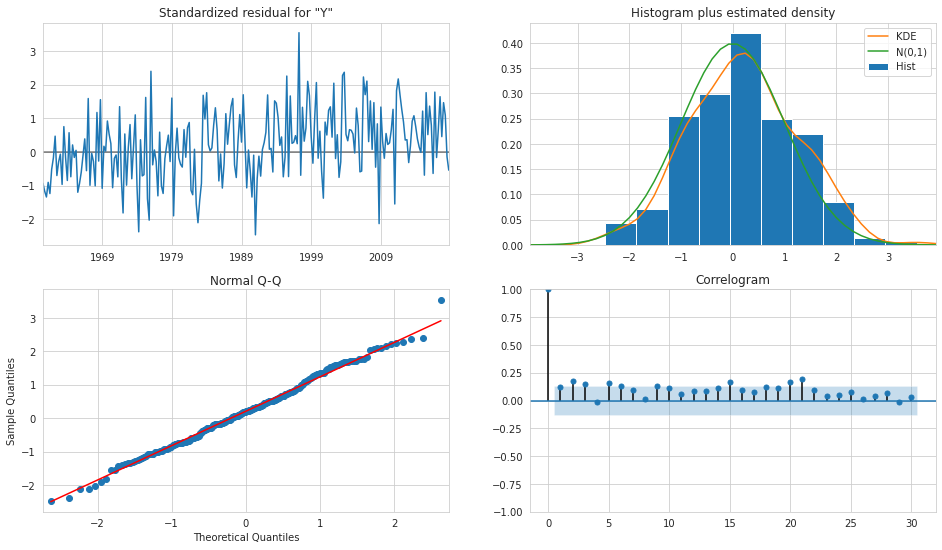

In [33]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(6,1,5))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [37]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,5))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -5309.092
Date:                Fri, 05 Nov 2021   AIC                          10640.185
Time:                        06:36:13   BIC                          10678.193
Sample:                    04-01-1960   HQIC                         10655.510
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1741      0.244     -4.810      0.000      -1.653      -0.696
ar.L2         -0.3788      0.091     -4.164      0.000      -0.557      -0.200
ar.L3          0.4426      0.043     10.350      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -5309.106
Date:                Fri, 05 Nov 2021   AIC                          10638.213
Time:                        06:36:25   BIC                          10672.766
Sample:                    04-01-1960   HQIC                         10652.145
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5172      0.225     -2.300      0.021      -0.958      -0.076
ar.L2          0.0134      0.112      0.120      0.904      -0.205       0.232
ar.L3          0.5177      0.108      4.774      0.0

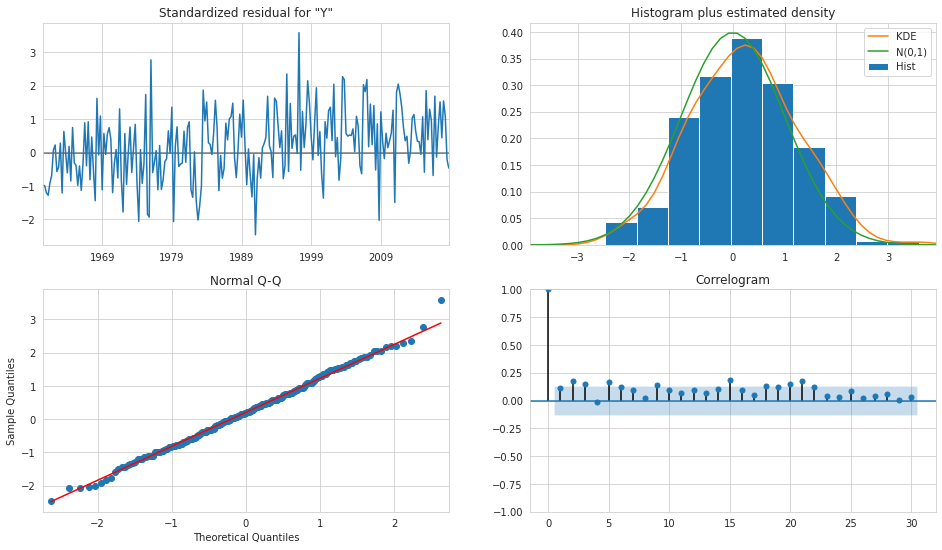

In [38]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,5))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -5309.858
Date:                Fri, 05 Nov 2021   AIC                          10639.715
Time:                        06:36:44   BIC                          10674.268
Sample:                    04-01-1960   HQIC                         10653.647
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8100      0.139     -5.845      0.000      -1.082      -0.538
ar.L2          0.0120      0.043      0.281      0.778      -0.072       0.096
ar.L3          0.8531      0.039     21.861      0.0

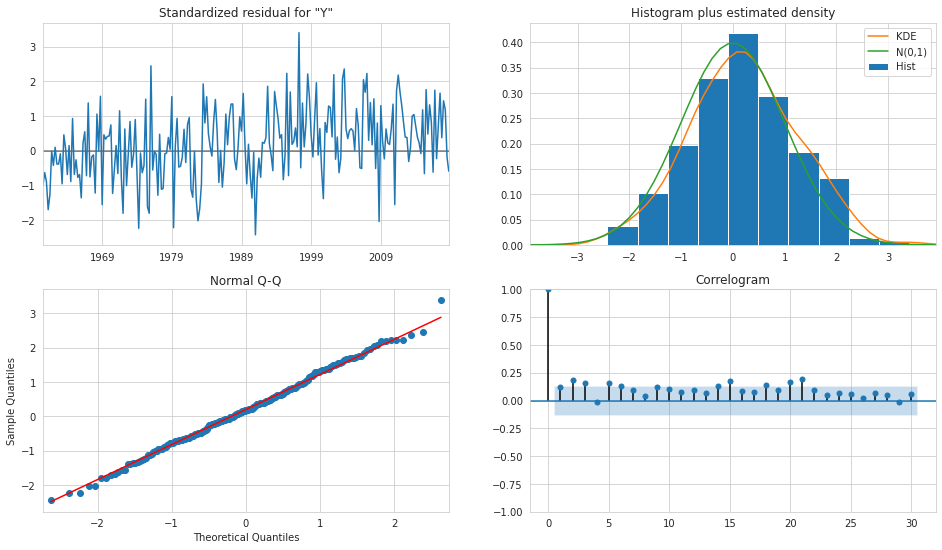

In [39]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(5,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -5307.952
Date:                Fri, 05 Nov 2021   AIC                          10633.904
Time:                        06:36:58   BIC                          10665.002
Sample:                    04-01-1960   HQIC                         10646.443
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0282      0.059    -17.513      0.000      -1.143      -0.913
ar.L2          0.0508      0.019      2.643      0.008       0.013       0.088
ar.L3          1.0533      0.018     58.827      0.0

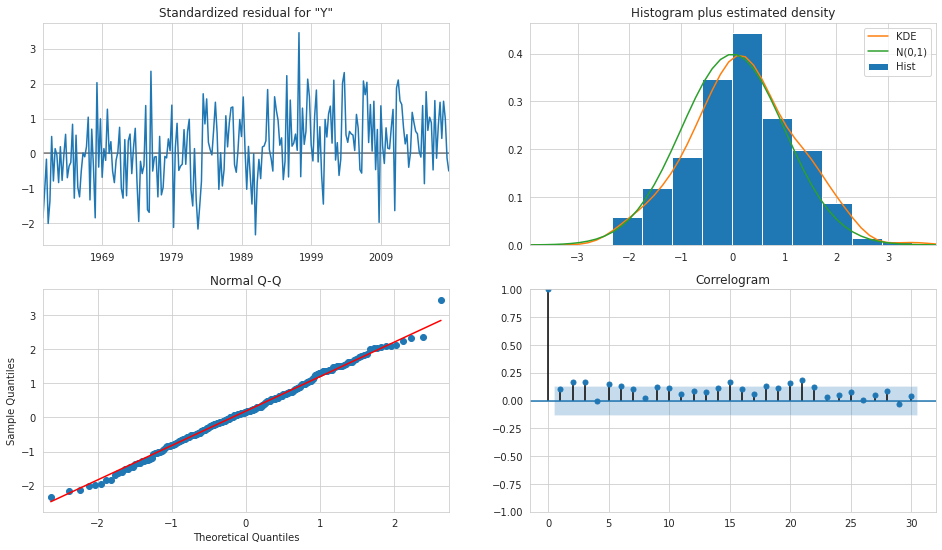

In [40]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -5307.264
Date:                Fri, 05 Nov 2021   AIC                          10630.529
Time:                        06:37:12   BIC                          10658.171
Sample:                    04-01-1960   HQIC                         10641.674
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8481      0.013    -67.495      0.000      -0.873      -0.823
ar.L2          0.8557      0.006    152.601      0.000       0.845       0.867
ar.L3          0.9924      0.012     82.825      0.0

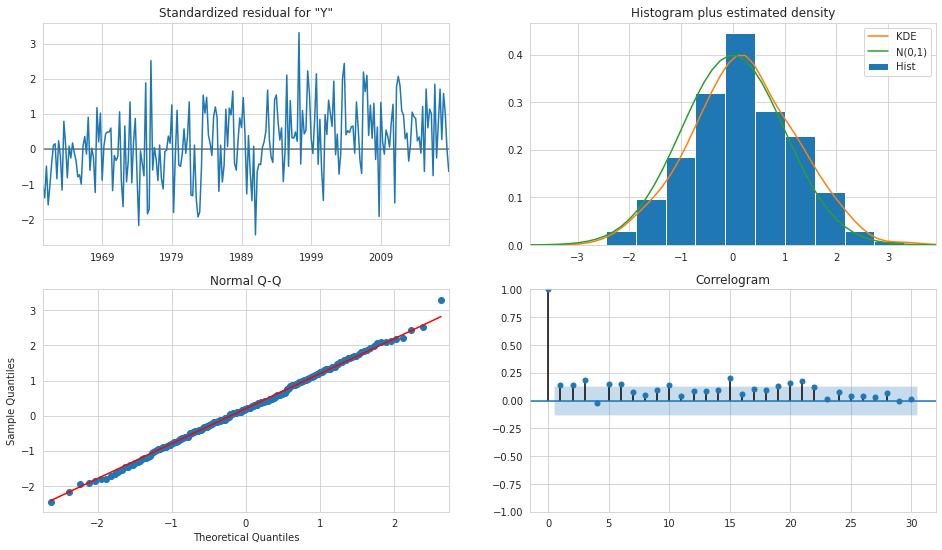

In [41]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,4))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -5307.573
Date:                Fri, 05 Nov 2021   AIC                          10631.145
Time:                        06:37:23   BIC                          10658.788
Sample:                    04-01-1960   HQIC                         10642.291
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8327      0.037    -22.578      0.000      -0.905      -0.760
ar.L2          0.8624      0.029     30.129      0.000       0.806       0.919
ar.L3          0.9768      0.034     29.117      0.0

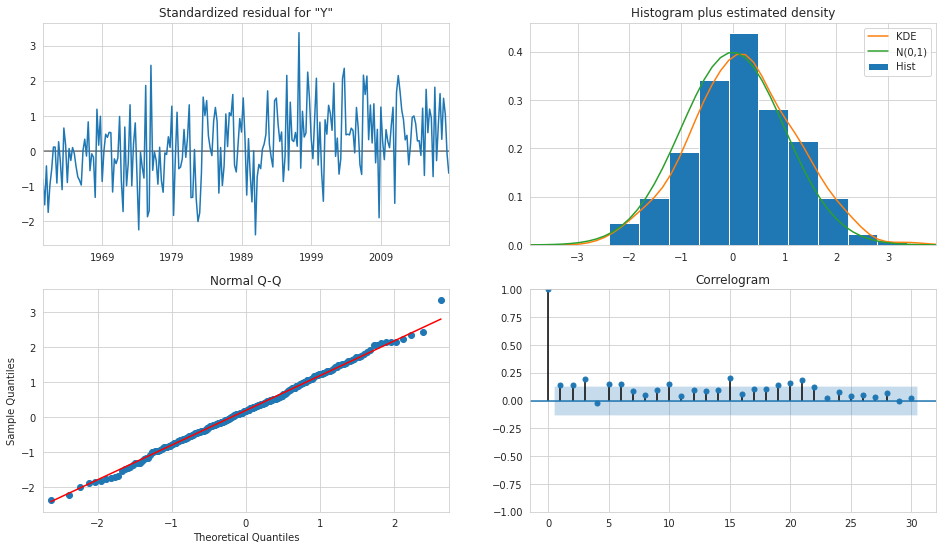

In [42]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(4,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -5308.976
Date:                Fri, 05 Nov 2021   AIC                          10631.953
Time:                        06:37:37   BIC                          10656.140
Sample:                    04-01-1960   HQIC                         10641.705
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4566      0.018    -25.820      0.000      -0.491      -0.422
ar.L2          0.4600      0.012     39.043      0.000       0.437       0.483
ar.L3          0.9966      0.017     59.490      0.0

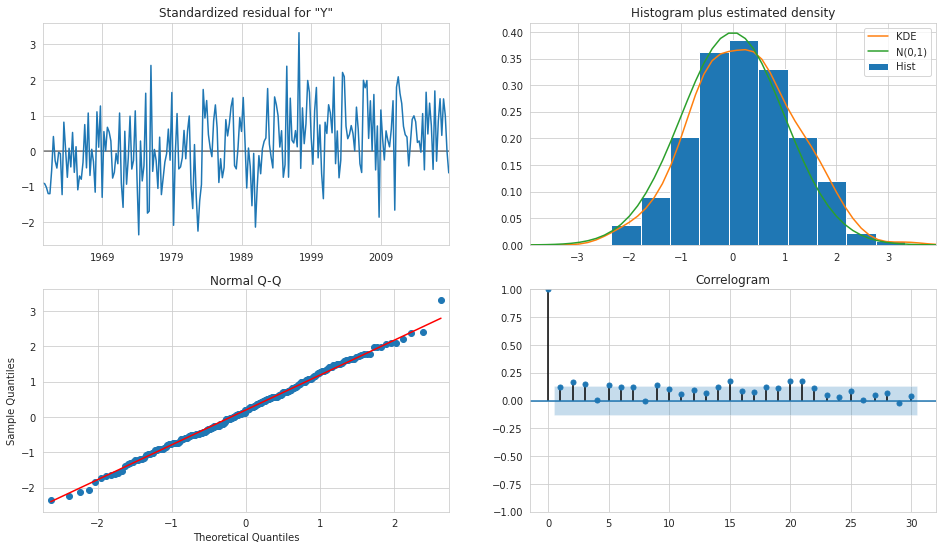

In [43]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5310.381
Date:                Fri, 05 Nov 2021   AIC                          10632.761
Time:                        06:37:50   BIC                          10653.493
Sample:                    04-01-1960   HQIC                         10641.120
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0020      0.069      0.029      0.977      -0.132       0.136
ar.L2          0.9980      0.068     14.591      0.000       0.864       1.132
ma.L1         -0.0004      0.113     -0.004      0.9

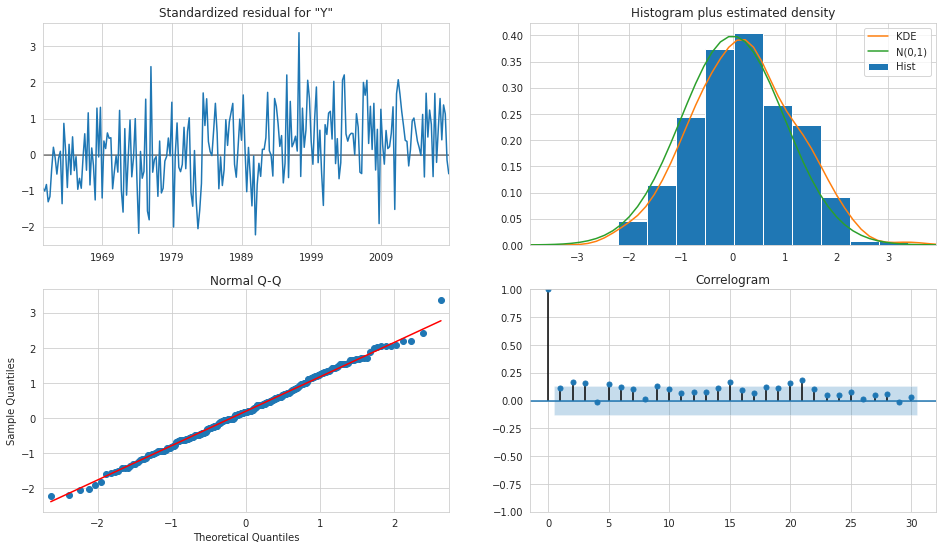

In [44]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,3))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5310.466
Date:                Fri, 05 Nov 2021   AIC                          10632.932
Time:                        06:38:01   BIC                          10653.664
Sample:                    04-01-1960   HQIC                         10641.291
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0023      0.440      0.005      0.996      -0.859       0.864
ar.L2          0.9984      0.445      2.243      0.025       0.126       1.871
ar.L3         -0.0008      0.027     -0.028      0.9

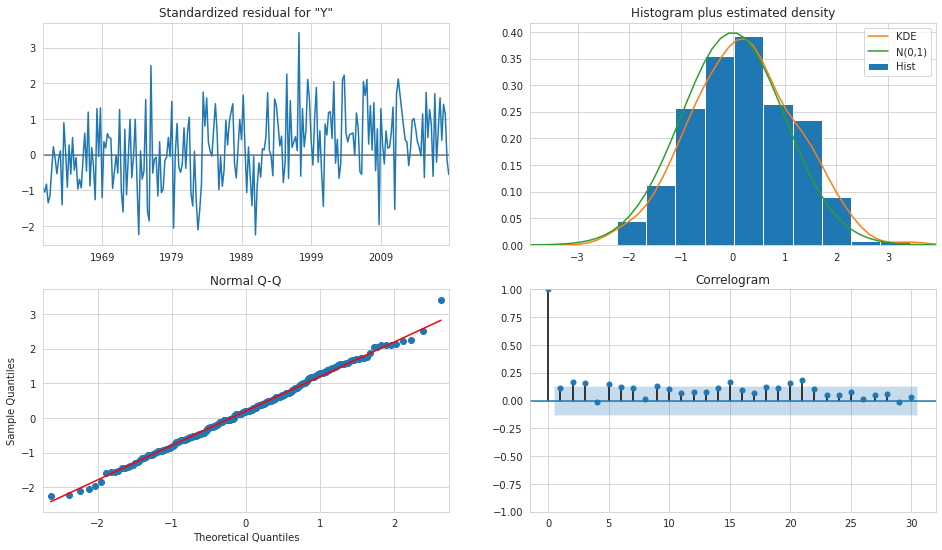

In [45]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(3,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5310.382
Date:                Fri, 05 Nov 2021   AIC                          10630.764
Time:                        06:38:14   BIC                          10648.040
Sample:                    04-01-1960   HQIC                         10637.730
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0015      0.070      0.022      0.983      -0.135       0.138
ar.L2          0.9985      0.070     14.363      0.000       0.862       1.135
ma.L1         -0.0007      0.109     -0.006      0.9

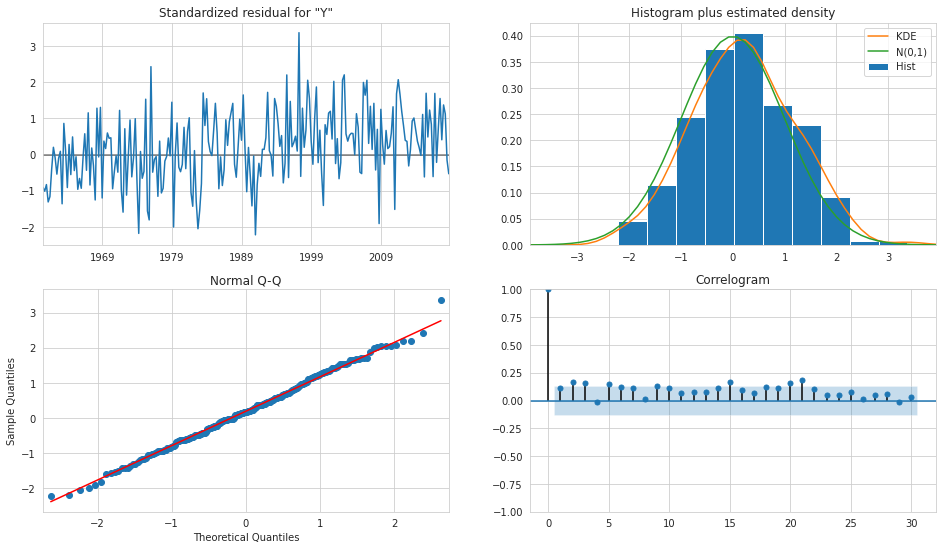

In [46]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5310.573
Date:                Fri, 05 Nov 2021   AIC                          10629.145
Time:                        06:38:28   BIC                          10642.966
Sample:                    04-01-1960   HQIC                         10634.718
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    590.999      0.000       0.997       1.003
ma.L1         -0.9983      0.065    -15.385      0.000      -1.125      -0.871
ma.L2         -0.0010      0.028     -0.036      0.9

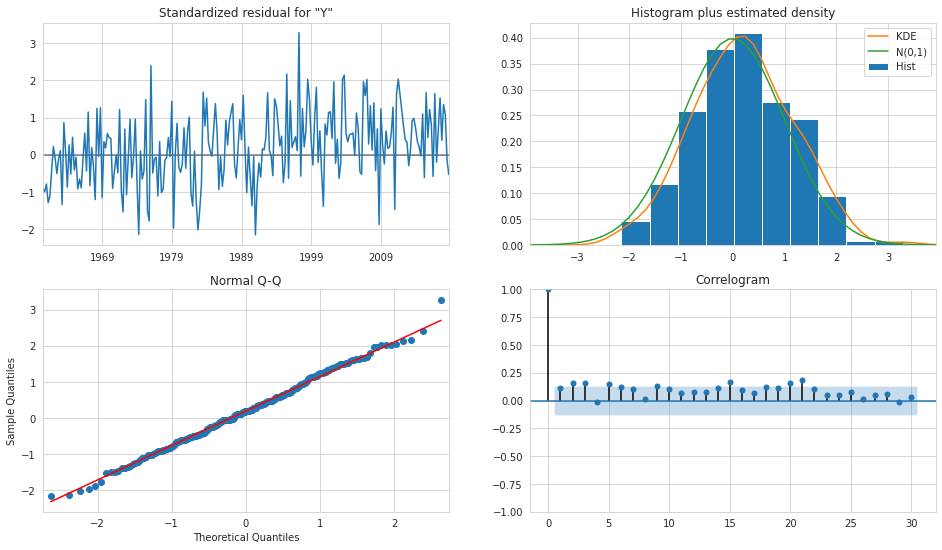

In [47]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,2))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5310.512
Date:                Fri, 05 Nov 2021   AIC                          10629.024
Time:                        06:38:40   BIC                          10642.846
Sample:                    04-01-1960   HQIC                         10634.597
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0007      0.028     35.360      0.000       0.945       1.056
ar.L2         -0.0007      0.028     -0.026      0.980      -0.056       0.054
ma.L1         -0.9992      0.055    -18.087      0.0

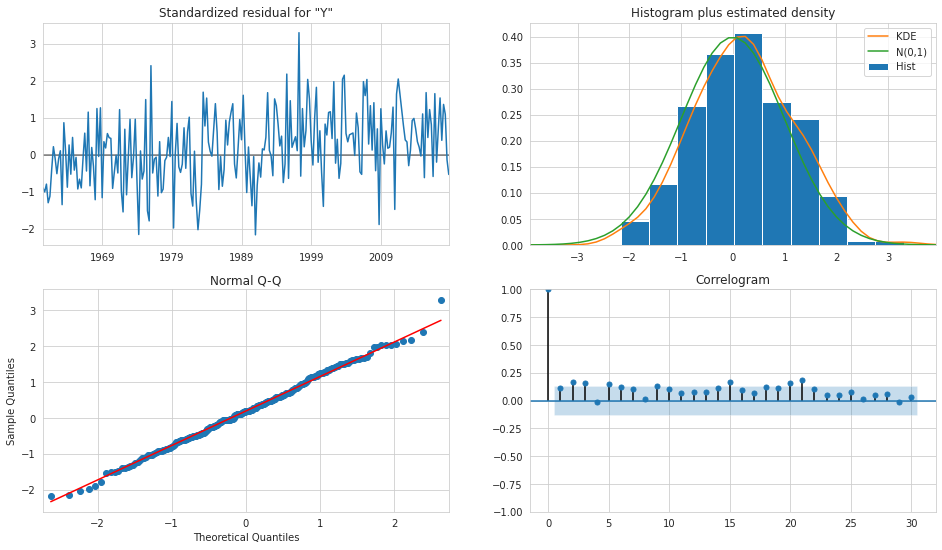

In [48]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(2,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5310.517
Date:                Fri, 05 Nov 2021   AIC                          10627.034
Time:                        06:38:55   BIC                          10637.400
Sample:                    04-01-1960   HQIC                         10631.213
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    641.227      0.000       0.997       1.003
ma.L1         -0.9994      0.065    -15.470      0.000      -1.126      -0.873
sigma2      3.121e+18        nan        nan        n

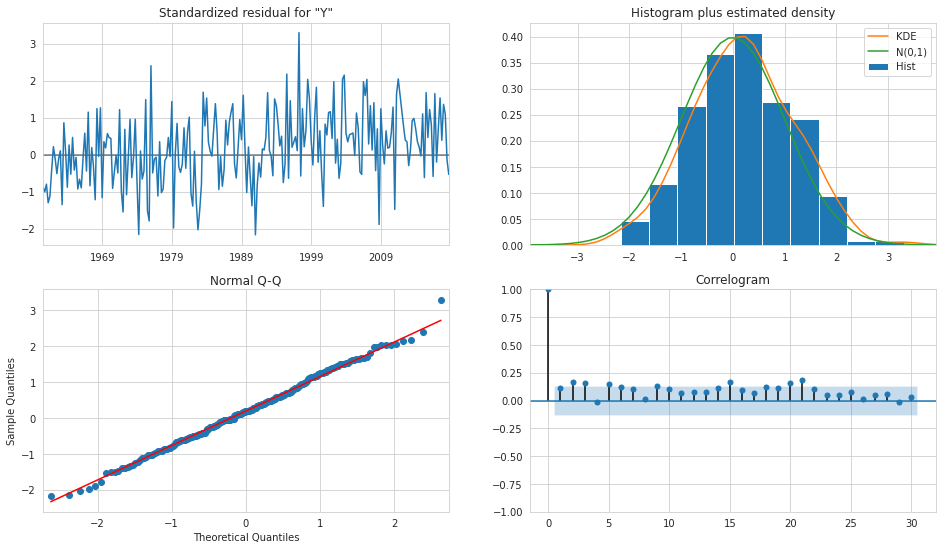

In [49]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5382.353
Date:                Fri, 05 Nov 2021   AIC                          10768.706
Time:                        06:39:09   BIC                          10775.617
Sample:                    04-01-1960   HQIC                         10771.492
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1182      0.012      9.836      0.000       0.095       0.142
sigma2      5.889e+18   9.65e-23    6.1e+40      0.000    5.89e+18    5.89e+18
Ljung-Box (L1) (Q):                   0.06   Jarque-

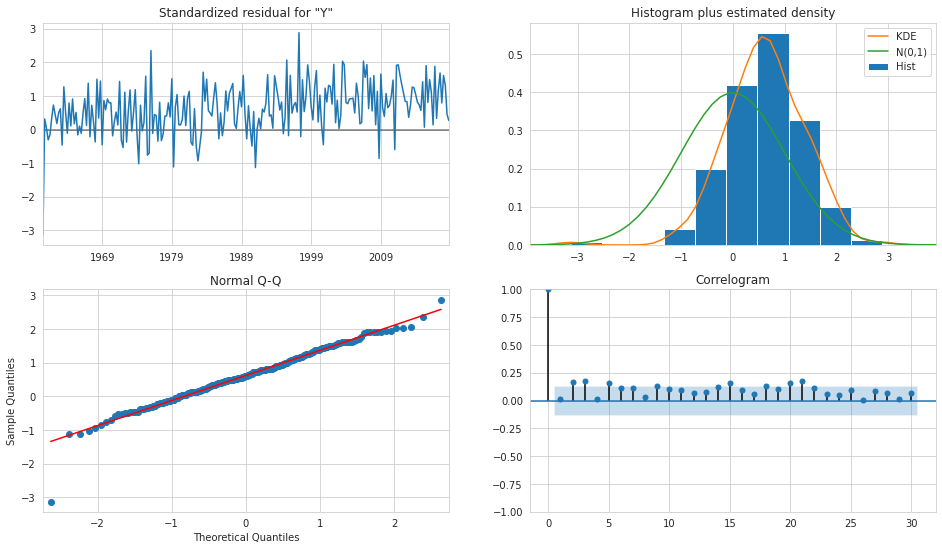

In [50]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(0,1,1))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5386.664
Date:                Fri, 05 Nov 2021   AIC                          10777.329
Time:                        06:39:24   BIC                          10784.239
Sample:                    04-01-1960   HQIC                         10780.115
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1397      0.007     21.333      0.000       0.127       0.153
sigma2      4.013e+18   9.65e-23   4.16e+40      0.000    4.01e+18    4.01e+18
Ljung-Box (L1) (Q):                   0.01   Jarque-

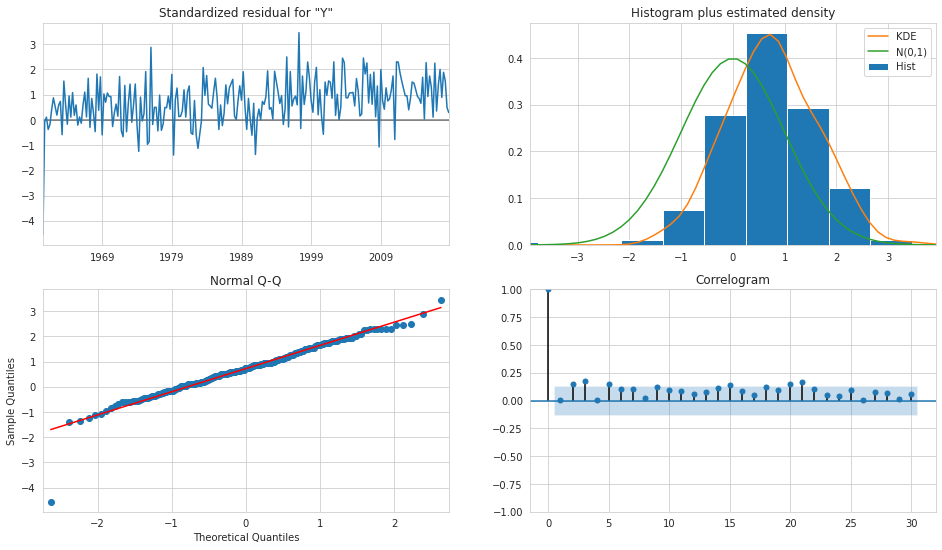

In [51]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,0))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -5390.251
Date:                Fri, 05 Nov 2021   AIC                          10782.501
Time:                        06:39:42   BIC                          10785.957
Sample:                    04-01-1960   HQIC                         10783.895
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.941e+18    6.3e+17      9.423      0.000    4.71e+18    7.18e+18
Ljung-Box (L1) (Q):                   5.27   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.02   Pr

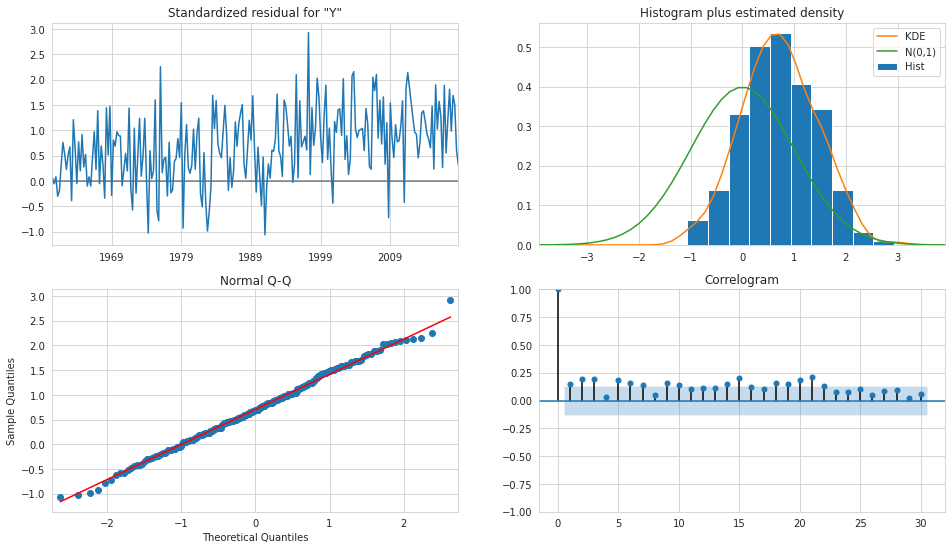

In [52]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(0,1,0))
res = mod.fit()
print(res.summary())

fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

#According to both the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), *p = q =1* is optimal.

In [53]:
mod = ARIMA(df2['Y'][df2.index.year<=2018], order=(1,1,1))
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  235
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5310.517
Date:                Fri, 05 Nov 2021   AIC                          10627.034
Time:                        06:41:38   BIC                          10637.400
Sample:                    04-01-1960   HQIC                         10631.213
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    641.227      0.000       0.997       1.003
ma.L1         -0.9994      0.065    -15.470      0.000      -1.126      -0.873
sigma2      3.121e+18        nan        nan        n

# Ljung-Box Test for all lag values smaller than 40 for *p=q=1*

In [54]:
sm.stats.acorr_ljungbox(res.resid, return_df=True)

,lb_stat,lb_pvalue
1,0.022706,0.880224
2,0.032497,0.983883
3,0.033082,0.998415
4,0.355571,0.985950
5,0.386041,0.995705
6,0.387209,0.998953
7,0.440689,0.999636
8,0.447643,0.999913
9,0.447660,0.999981
10,0.459422,0.999996


In [55]:
res.predict()

1960-04-01    0.000000e+00
1960-07-01    6.817570e+10
1960-10-01    6.828691e+10
1961-01-01    6.811011e+10
1961-04-01    6.827632e+10
                  ...     
2017-10-01    4.594050e+11
2018-01-01    4.618076e+11
2018-04-01    4.659346e+11
2018-07-01    4.695968e+11
2018-10-01    4.710798e+11
Freq: QS-OCT, Name: predicted_mean, Length: 235, dtype: float64

# Forecast

In [56]:
res.forecast(steps=5)

2019-01-01    4.718624e+11
2019-04-01    4.735847e+11
2019-07-01    4.753071e+11
2019-10-01    4.770294e+11
2020-01-01    4.787517e+11
Freq: QS-OCT, Name: predicted_mean, dtype: float64

In [57]:
df2['Y']

date
1960-04-01    6.647300e+10
1960-07-01    6.662300e+10
1960-10-01    6.649000e+10
1961-01-01    6.669000e+10
1961-04-01    6.595800e+10
                  ...     
2019-01-01    4.722670e+11
2019-04-01    4.751560e+11
2019-07-01    4.777910e+11
2019-10-01    4.802800e+11
2020-01-01    4.788110e+11
Name: Y, Length: 240, dtype: float64